In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pymgcv import terms as t
from pymgcv.gam import gam
from pymgcv.plot import plot_1d, plot_2d
from pymgcv.gam import ModelSpecification

n = 500
rng = np.random.default_rng(42)

x0 =  rng.normal(0, 1, size=n)
x1 = rng.normal(0, 1, size=n)
x2 = rng.normal(0, 1, size=n)
x3 = rng.normal(0, 1, size=n)
y = 0.2*x0 + np.cos(x1) + 0.2*x2 + 1*x3**2 + 3 + rng.normal(0, 1, size=n)

data = pd.DataFrame({"x0": x0, "x1": x1, "x2": x2, "x3": x3, "y": y })


model = ModelSpecification(
    {"y": [t.Linear("x0"), t.TensorSmooth("x1", "x2"), t.Smooth("x3")]}
)


fit = gam(model, data)

/home/dw16200/projects/pymgcv/.pixi/envs/dev/lib/python3.13/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "PWD" redefined by R and overriding existing variable. Current: "/home/dw16200/projects/pymgcv", R: "/home/dw16200/projects/pymgcv/docs/examples"
  warnings.warn(
/home/dw16200/projects/pymgcv/.pixi/envs/dev/lib/python3.13/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "R_SESSION_TMPDIR" redefined by R and overriding existing variable. Current: "/tmp/RtmpOuyzWv", R: "/tmp/RtmpOKqX4c"
  warnings.warn(


/home/dw16200/projects/pymgcv/.pixi/envs/dev/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '


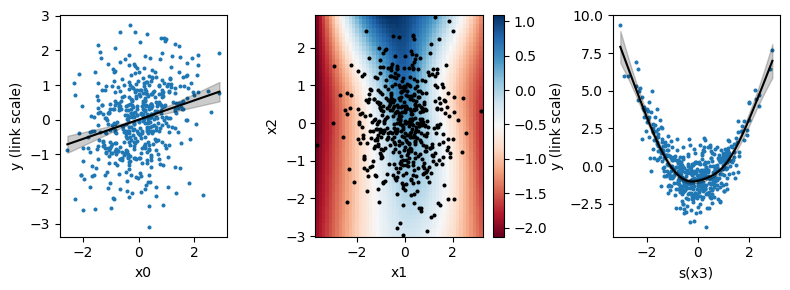

In [2]:

fig, axes = plt.subplots(
    ncols=len(fit.model_specification.mean_predictors["y"]),
    width_ratios=[2, 2.5, 2],
    )

plot_1d(
    response="y",
    term=fit.model_specification.mean_predictors["y"][0],
    gam=fit,
    data=data,
    ax=axes[0],
    )

plot_2d(
    response="y",
    term=fit.model_specification.mean_predictors["y"][1],
    gam=fit,
    data=data,
    ax=axes[1]
)

plot_1d(
    response="y",
    term=fit.model_specification.mean_predictors["y"][2],
    gam=fit,
    data=data,
    ax=axes[2],
)
    
fig.set_size_inches(8, 3, forward=True)
fig.tight_layout()

In [4]:
print(fit.summary())  


Family: gaussian 
Link function: identity 

Formula:
y ~ x0 + te(x1, x2) + s(x3)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.62866    0.04531 102.154  < 2e-16 ***
x0           0.27751    0.04803   5.778 1.36e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
            edf Ref.df       F p-value    
te(x1,x2) 9.322 11.743   9.311  <2e-16 ***
s(x3)     5.587  6.787 151.381  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.706   Deviance explained = 71.5%
GCV = 1.0622  Scale est. = 1.0263    n = 500


In [5]:
fit.predict(data).head()

,fit,se
,y,y
0,3.522927,0.144154
1,3.526746,0.142319
2,5.489942,0.150612
3,3.594713,0.157288
4,1.426069,0.333111


In [7]:
fit.partial_effects(data)["y"].head()

fit                                      se                      \
  intercept     s(x3) te(x1,x2)        x0 intercept     s(x3) te(x1,x2)   
0  4.628663 -0.874384 -0.315913  0.084561  0.045311  0.074902  0.120406   
1  4.628663 -0.815124  0.001809 -0.288602  0.045311  0.076280  0.107109   
2  4.628663  0.735057 -0.082033  0.208255  0.045311  0.121285  0.077293   
3  4.628663 -0.800627 -0.494335  0.261013  0.045311  0.072093  0.124607   
4  4.628663 -1.024214 -1.636955 -0.541425  0.045311  0.070077  0.311484   

             
         x0  
0  0.014636  
1  0.049952  
2  0.036045  
3  0.045176  
4  0.093711